In [1]:
df=pd.read_excel("E:\HTL Project\Dataset 4.xlsx")
df.head()

<IPython.core.display.Javascript object>

,Moisture,Volatile,Ash,Temp,Time,Pressure,HHV,ERR,Yield%
0,11.8,67.0,8.6,300,30,130,35.2,37.2,36.0
1,3.9,67.4,24.4,350,60,180,37.9,42.7,43.0
2,5.8,67.3,9.5,250,60,100,33.8,33.0,33.0
3,8.5,61.6,18.5,250,30,100,34.8,41.5,24.7
4,4.9,54.4,13.5,375,50,221,36.0,64.8,55.3


In [2]:
df['Moisture']=df['Moisture'].fillna(df['Moisture'].mode()[0])
df['Volatile']=df['Volatile'].fillna(df['Volatile'].mode()[0])
df['ERR']=df['ERR'].fillna(df['ERR'].mode()[0])

In [6]:
x=df.drop('ERR',axis=1)
y=df['ERR']
from sklearn.feature_selection import SelectFromModel
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)
print(encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(encoded))
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,encoded)
y_pred =clf.predict(x_test)
y_pred
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))
clf1 = tree.DecisionTreeClassifier()
clf1.fit(x_train,encoded)
y_pred1 =clf1.predict(x_train)
y_pred1
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred1-y_train)))
print("Root mean square error: " ,np.mean(y_pred1-y_train)**2)
print("R2 square: " ,r2_score(y_pred1,y_train))

<IPython.core.display.Javascript object>

[27 32  9 15 24 60 10 45  9  4  9 10 22 57  8 61  9  3 59 11  5 54 56 37
  6 46  9 51 53 39 62 42 16 14 29 17 12 33 35 18 23 47 26  9 41 28  7 30
 43  8 20 50 52 49 44 25 55 31 36 38  1 58 10  2 21 22 13 48 40  9 18 57
 15 34 30 19  9 18  0  9]
continuous
multiclass
multiclass


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  11.099999999999998


<IPython.core.display.Javascript object>

Root mean square error:  0.28090000000000004
R2 square:  0.483553494932911


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  5.536250000000001


<IPython.core.display.Javascript object>

Root mean square error:  1.8666390625000004
R2 square:  0.8694170932790752


In [7]:
params = {
    'max_depth': [5,10,20,50,100]
}

In [8]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=clf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=4, verbose=2)

In [9]:
rf_grid.fit(x_train,encoded)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': [5, 10, 20, 50, 100]}, verbose=2)

In [10]:
rf_grid.best_params_

{'max_depth': 100}

In [11]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
64,14.6,9
55,50.1,52
28,35.0,62
16,52.8,52
43,32.7,42


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

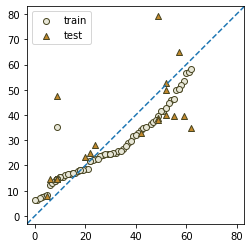

In [12]:
fig, ax = plt.subplots()
ax.scatter(y_pred1,y_train,label='train',color='#e8e7d8',edgecolors='#494623')
ax.scatter(y_pred,y_test,label='test',color='#c3892b',marker ="^",edgecolors='#494623')
#ax.xlabel('Actual Values of HHV',fontsize=14)
#ax.ylabel('Predicted Values of HHV',fontsize=14)
ax.legend()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, '--')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
fig.savefig('/Users/Rishi Chaitanya/Desktop/DT ERR 4.png', dpi=300)